### Which MOEA is the Best ?

Algorithms to be considered
* SPEA 2
* NSGA 2
* RNSGA2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [2]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())
import numpy as np
from pymoo.util.plotting import plot

Compiled Extensions:  True


In [3]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize


#### SPEA2 nobj = 2 , nvar = 2

In [4]:
model_list = []
problem = DTLZ2(n_obj=2)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     13 |  0.3251204645 |  0.4812177621 |  0.0499661431 |  0.4812177621 |  0.3249417647
     2 |      200 |     12 |  0.2730827193 |  0.4187416626 |  0.0499661431 |  0.4187416626 |  0.2713438239
     3 |      300 |     15 |  0.2467284612 |  0.3094822386 |  0.0499661431 |  0.3094822386 |  0.2425142944
     4 |      400 |     17 |  0.1738874157 |  0.2277169492 |  0.0660021142 |  0.2277169492 |  0.1564818577
     5 |      500 |     20 |  0.1364085220 |  0.1657146272 |  0.0761227509 |  0.1657145893 |  0.1191800051
     6 |      600 |     23 |  0.1237183717 |  0.1439125327 |  0.0991688290 |  0.1439125327 |  0.1025344779
     7 |      700 |     27 |  0.1052046498 |  0.1179193027 |  0.1042240044 |  0.1179191139 |  0.0864683195
     8 |      800 |     29 |  0.0897011313 |  0.0891378008 |  0.1200843356 |  0.0891345680 |  0.0692627542
     9 |      900 |     25 |  0.07487

In [5]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]





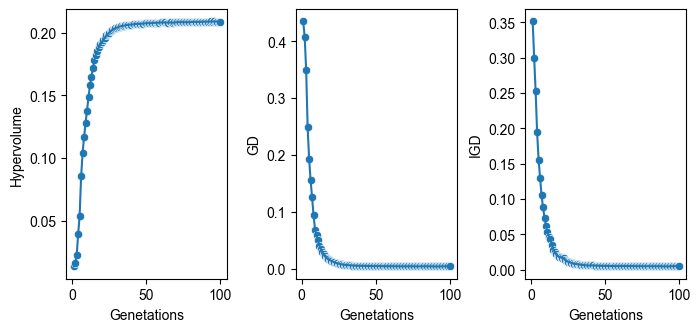

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

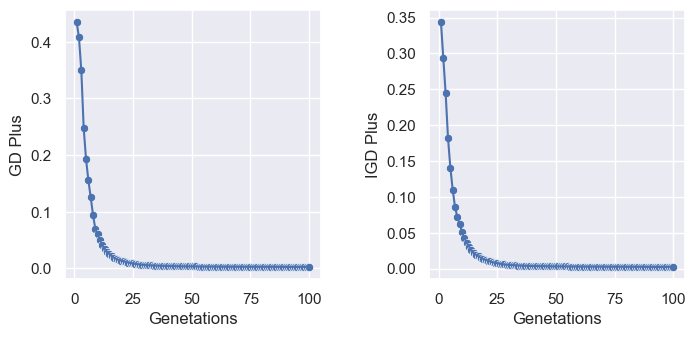

In [7]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

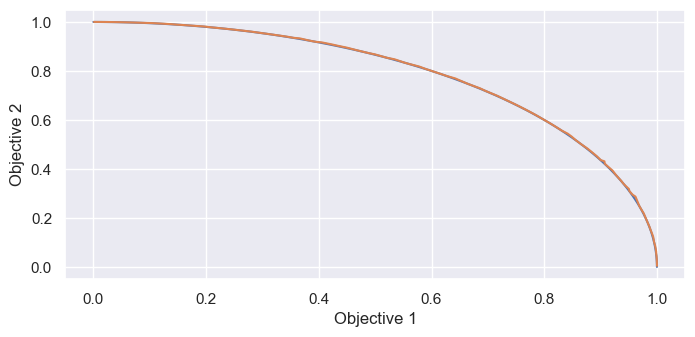

In [8]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### SPEA2 nobj = 2 , nvar = 3

In [9]:
model_list = []
problem = DTLZ2(n_obj=2,n_var=3)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     14 |  0.0515917749 |  0.0277691231 |  0.1538364055 |  0.0276066233 |  0.0409315790
     2 |      200 |     29 |  0.0317036939 |  0.0216184297 |  0.1771477523 |  0.0215032607 |  0.0268893148
     3 |      300 |     42 |  0.0263021198 |  0.0210230561 |  0.1846462451 |  0.0207889905 |  0.0165308544
     4 |      400 |     53 |  0.0204327355 |  0.0127358972 |  0.1915561981 |  0.0123771500 |  0.0125715744
     5 |      500 |     68 |  0.0179662996 |  0.0120857121 |  0.1951433098 |  0.0116499937 |  0.0103678624
     6 |      600 |     81 |  0.0123123349 |  0.0092093051 |  0.1985186298 |  0.0086095606 |  0.0085102010
     7 |      700 |     87 |  0.0104400705 |  0.0080144966 |  0.2019511734 |  0.0072535096 |  0.0065294339
     8 |      800 |    100 |  0.0090060819 |  0.0075467070 |  0.2039655616 |  0.0067381274 |  0.0055459063
     9 |      900 |    100 |  0.00871

In [10]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]

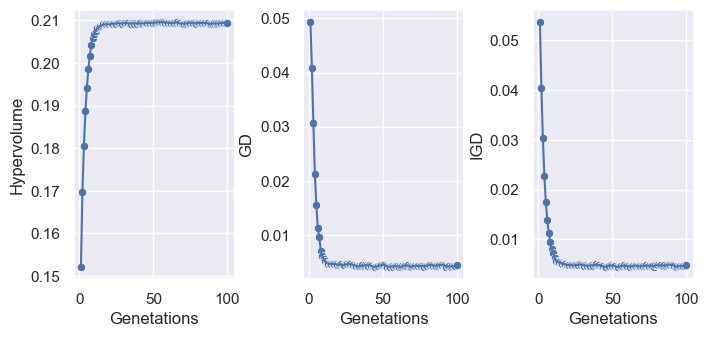

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

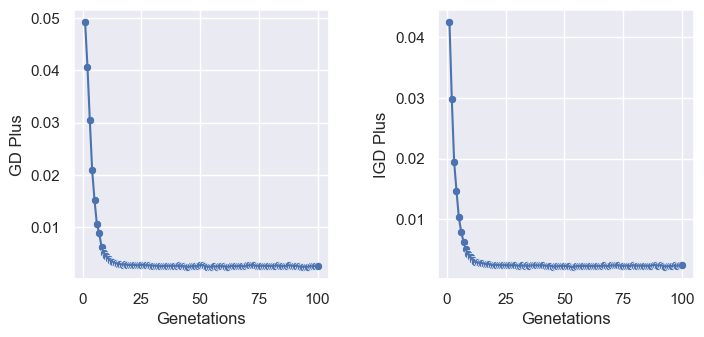

In [12]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')

Text(0, 0.5, 'Objective 2')

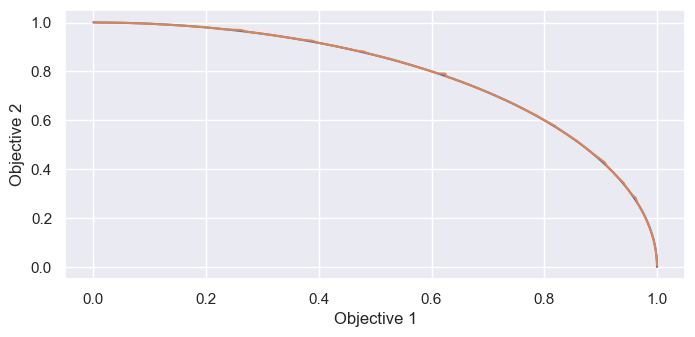

In [13]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### SPEA2 nobj = 2 , nvar = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     11 |  0.1236854845 |  0.1516551393 |  0.0886627706 |  0.1516500611 |  0.0867509356
     2 |      200 |     15 |  0.0898465620 |  0.1539919322 |  0.1140188224 |  0.1539882081 |  0.0650088024
     3 |      300 |     16 |  0.0739734901 |  0.0830540947 |  0.1306066628 |  0.0829693237 |  0.0443028712
     4 |      400 |     24 |  0.0495526469 |  0.0837688188 |  0.1510433913 |  0.0836962958 |  0.0316080829
     5 |      500 |     29 |  0.0391046759 |  0.0438125534 |  0.1581008497 |  0.0436890327 |  0.0273004203
     6 |      600 |     40 |  0.0294682344 |  0.0309560008 |  0.1706295291 |  0.0307855604 |  0.0211789541
     7 |      700 |     53 |  0.0204976740 |  0.0224118365 |  0.1857404390 |  0.0221554926 |  0.0146159887
     8 |      800 |     69 |  0.0180612065 |  0.0173770437 |  0.1897076750 |  0.0170602115 |  0.0123687345
     9 |      900 |     88 |  0.01482

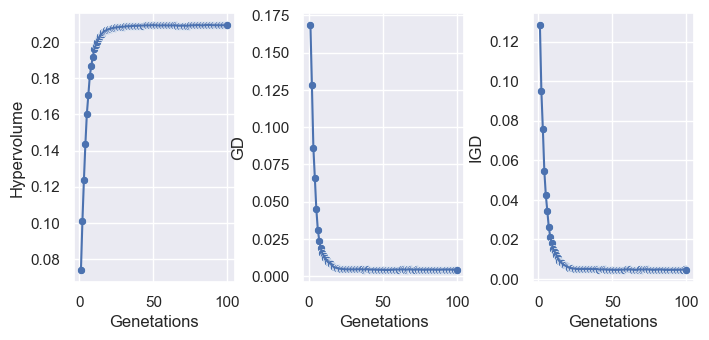

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

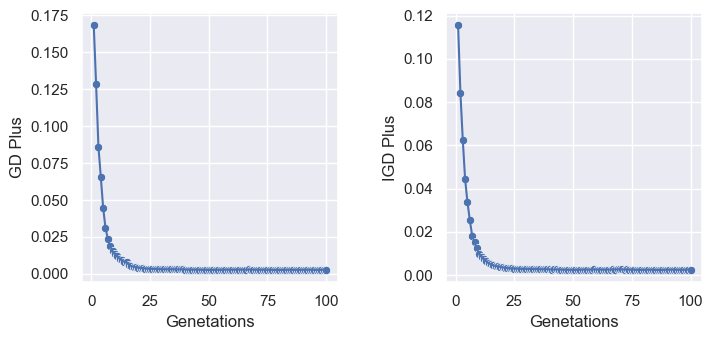

In [14]:
model_list = []
problem = DTLZ2(n_obj=2,n_var = 5)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### SPEA2 nobj = 2 , nvar = 10

In [15]:
model_list = []
problem = DTLZ2(n_obj=2,n_var =10)
algorithm = SPEA2(pop_size=1000)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |     1000 |     23 |  0.2407274812 |  0.4212478331 |  0.0105957865 |  0.4212475222 |  0.2310563685
     2 |     2000 |     18 |  0.1877990690 |  0.2960066584 |  0.0114897644 |  0.2960066529 |  0.1655077590
     3 |     3000 |     14 |  0.1324272504 |  0.1921039615 |  0.0544139523 |  0.1921020025 |  0.1149726834
     4 |     4000 |     26 |  0.1104483825 |  0.1763731510 |  0.0953863825 |  0.1763709131 |  0.0945730089
     5 |     5000 |     23 |  0.0797915844 |  0.1308299155 |  0.1104305454 |  0.1308273353 |  0.0676806471
     6 |     6000 |     28 |  0.0629830336 |  0.0735012178 |  0.1307220372 |  0.0734990984 |  0.0517702212
     7 |     7000 |     42 |  0.0500590398 |  0.0580061350 |  0.1467428856 |  0.0579964484 |  0.0411589885
     8 |     8000 |     56 |  0.0409249069 |  0.0501916059 |  0.1590431940 |  0.0501766004 |  0.0352300190
     9 |     9000 |     71 |  0.03416

KeyboardInterrupt: 

#### NSGA2 nobj = 2 nvar = 2

In [30]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=2)
algorithm = NSGA2(pop_size=1000)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |     1000 |     19 |  0.2058326926 |  0.3799262191 |  0.0215021093 |  0.3799260989 |  0.1961436922
     2 |     2000 |     22 |  0.1818287676 |  0.3705227870 |  0.0406339830 |  0.3705226024 |  0.1734281748
     3 |     3000 |     29 |  0.1615517578 |  0.3289993923 |  0.0585406449 |  0.3289992523 |  0.1526245483
     4 |     4000 |     19 |  0.1234276604 |  0.1620177014 |  0.0801267028 |  0.1620177014 |  0.1151908857
     5 |     5000 |     23 |  0.0886983894 |  0.1399916381 |  0.1110183223 |  0.1399916381 |  0.0864568979
     6 |     6000 |     30 |  0.0745064432 |  0.1002662886 |  0.1276173795 |  0.1002662886 |  0.0712859034
     7 |     7000 |     36 |  0.0726492131 |  0.0763002967 |  0.1378018136 |  0.0762970800 |  0.0546975651
     8 |     8000 |     48 |  0.0544186219 |  0.0553897767 |  0.1534155318 |  0.0553859644 |  0.0432043577
     9 |     9000 |     60 |  0.03742

In [31]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]





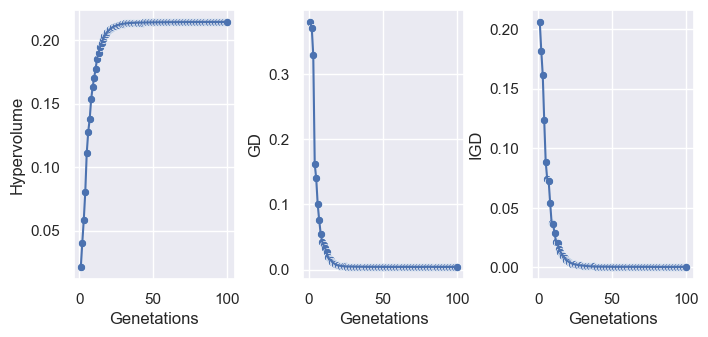

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

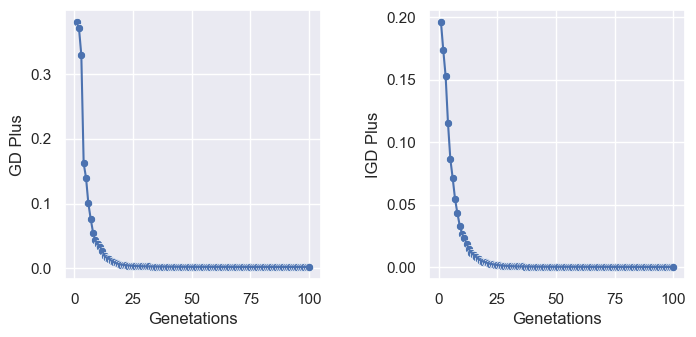

In [33]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

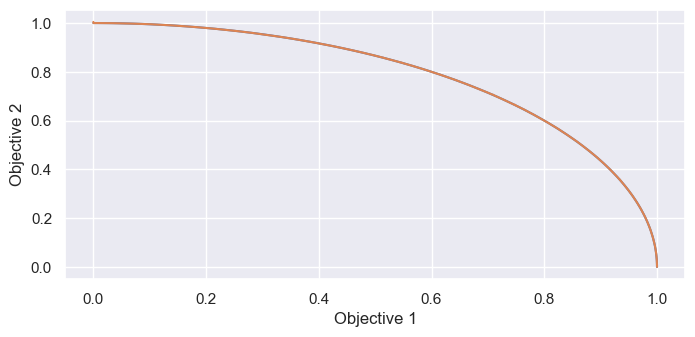

In [34]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA2 nobj = 2 nvar = 3

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=3)
algorithm = NSGA2(pop_size=1000)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA2 nobj  =2 nvar = 5

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=5)
algorithm = NSGA2(pop_size=1000)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA2 nobj = 2 nvar = 10

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=10)
algorithm = NSGA2(pop_size=1000)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### MOEAD nobj = 2 , nvar = 2

In [36]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=2)
ref_dirs = get_reference_directions('energy',2,90,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |     12 |  0.3217136408 |  0.4410974669 |  0.0119808275 |  0.4410974669 |  0.3192903011
     2 |      180 |     73 |  0.2563709111 |  0.2550787484 |  0.0183332685 |  0.2550787484 |  0.2457642571
     3 |      270 |     51 |  0.1992612016 |  0.2148022414 |  0.0261473482 |  0.2148022414 |  0.1788647321
     4 |      360 |     71 |  0.1727551147 |  0.1133500111 |  0.0631058062 |  0.1133327035 |  0.1128899812
     5 |      450 |     82 |  0.1145291619 |  0.0483443908 |  0.0798944528 |  0.0483117742 |  0.0757147043
     6 |      540 |     85 |  0.0744170144 |  0.0313395479 |  0.1248542400 |  0.0306257930 |  0.0481921909
     7 |      630 |     88 |  0.0655139961 |  0.0200867948 |  0.1372847971 |  0.0194793198 |  0.0385318185
     8 |      720 |     89 |  0.0535134435 |  0.0128782312 |  0.1536015835 |  0.0120941669 |  0.0308958563
     9 |      810 |     89 |  0.04929

In [37]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]





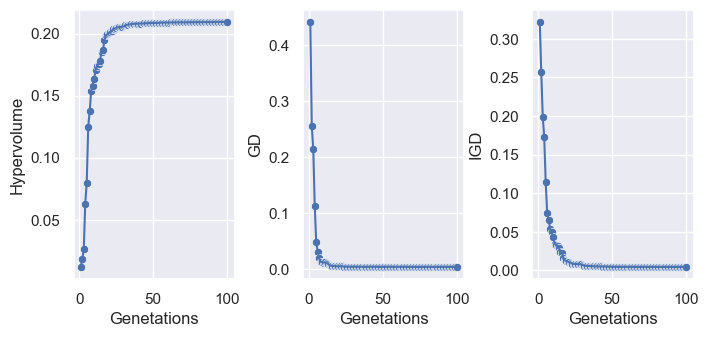

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

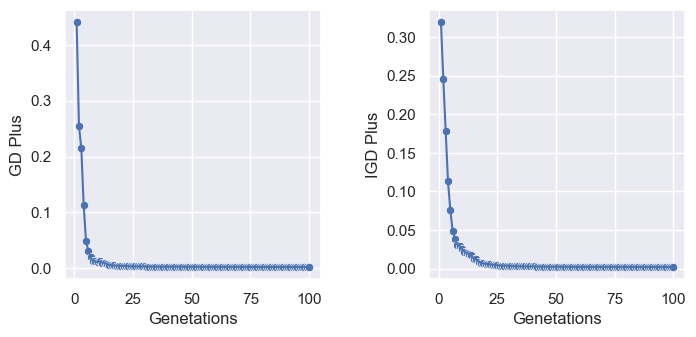

In [39]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

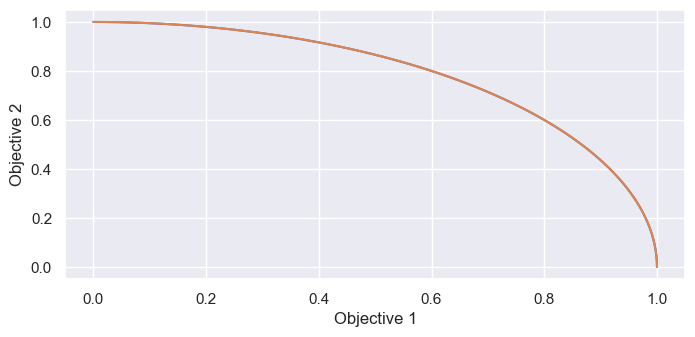

In [40]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### MOEAD nobj =2 nvars  = 3

In [ ]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=3)
ref_dirs = get_reference_directions('energy',2,90,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### MOEAD nobj = 2 nvars = 5

In [ ]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=5)
ref_dirs = get_reference_directions('energy',2,90,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### MOEAD nobjs = 2, nvars = 10

In [ ]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=10)
ref_dirs = get_reference_directions('energy',2,90,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA3 nobj = 2 nvars = 2

In [41]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=2)
ref_dirs = get_reference_directions('energy',2,90,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |      8 |  0.4924812169 |  0.5544717648 |  0.000000E+00 |  0.5544717648 |  0.4821369000
     2 |      180 |     10 |  0.4116273654 |  0.5382019772 |  0.000000E+00 |  0.5382019772 |  0.4106722467
     3 |      270 |      8 |  0.3062636042 |  0.3855576500 |  0.000000E+00 |  0.3855576500 |  0.2618719536
     4 |      360 |      7 |  0.3727475262 |  0.3500768589 |  0.000000E+00 |  0.3500768589 |  0.3286222231
     5 |      450 |      7 |  0.3193277569 |  0.3096709790 |  0.0023659151 |  0.3096709790 |  0.3057391916
     6 |      540 |      9 |  0.1974267514 |  0.2498115916 |  0.0228768938 |  0.2498115916 |  0.1784018044
     7 |      630 |      9 |  0.2501267254 |  0.2254557392 |  0.0539660820 |  0.2254557392 |  0.2313508824
     8 |      720 |      6 |  0.1799557576 |  0.2087822435 |  0.0588036182 |  0.2087822435 |  0.1686709576
     9 |      810 |      9 |  0.15734

In [42]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]

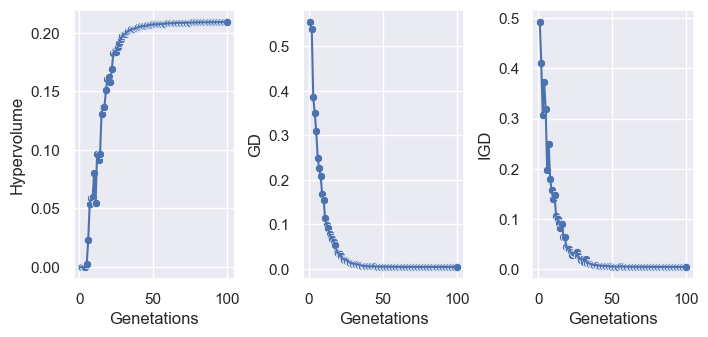

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

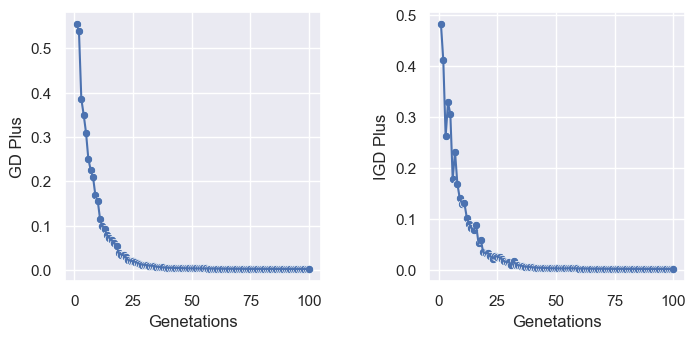

In [44]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

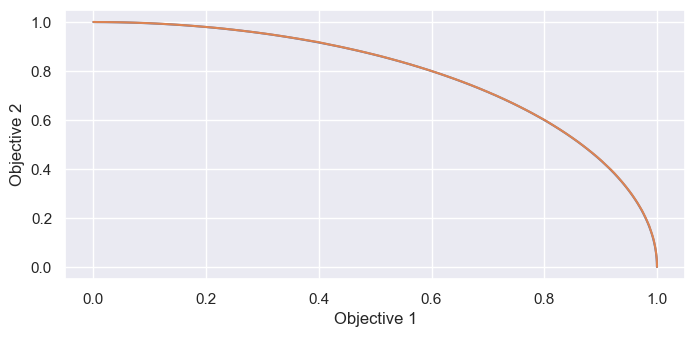

In [45]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA3 nobj = 2 , nvars  = 3

In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=3)
ref_dirs = get_reference_directions('energy',2,90,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



#### NSGA3 nobj = 2 , nvars = 5

In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=5)
ref_dirs = get_reference_directions('energy',2,90,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



#### NSGA3 nobj = 2 nvars = 10

In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=10)
ref_dirs = get_reference_directions('energy',2,90,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')

